## MUSTAFA YALÇIN CANBAY 
## B2180.060055

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("libraries added!")

libraries added!


## Problem-1 (15 Points)
For this problem, use the image named as tf2_engineer.jpg.
1. Read and display the original image in colour.
2. Find the centre of the image (𝑦𝑦𝑐𝑐, 𝑥𝑥𝑐𝑐) and print the intensity value at the centre.
3. Place a rectangular colour patch around the centre of the image. Height of the patch is 30 pixels;
width of the patch is 40 pixels. Patch Colour (in Hex): #329ea8
4. Print the intensity value at the centre of the colour patch.
5. Display the new image with colour patch. 

Center place: (92, 92)
Center color value (RGB): [172  92  67]
Square's center color value (BGR): [168 158  50]


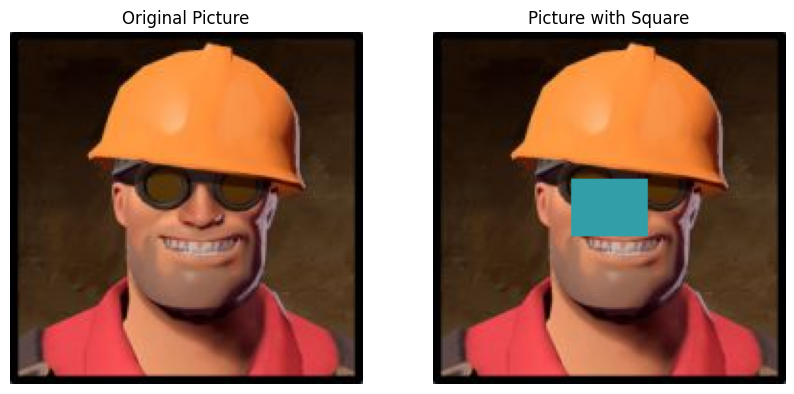

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/yalci/uyg332_project/images/tf2_engineer.jpg')
if img is None:
    print("Can't load picture, check the file path!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Picture')
    plt.axis('off')

    height, width = img.shape[:2]
    center_y, center_x = height // 2, width // 2
    center_intensity = img_rgb[center_y, center_x]
    print(f"Center place: ({center_x}, {center_y})")
    print(f"Center color value (RGB): {center_intensity}")

    img_patch = img.copy()
    patch_height, patch_width = 30, 40
    top_left_y = center_y - patch_height // 2
    top_left_x = center_x - patch_width // 2
    bottom_right_y = top_left_y + patch_height
    bottom_right_x = top_left_x + patch_width
    img_patch[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = [168, 158, 50]

    patch_center_intensity = img_patch[center_y, center_x]
    print(f"Square's center color value (BGR): {patch_center_intensity}")

    img_patch_rgb = cv2.cvtColor(img_patch, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(img_patch_rgb)
    plt.title('Picture with Square')
    plt.axis('off')
    plt.show()

## Problem-2 (15 Points)
For this problem, use the image named as einstein.tiff.
1. Read and display the original image in grayscale.
2. Find the negative of the input image.
3. Display the negative image.
4. From the original image get the intensity value of 5 random pixels, and from the negative image
get the intensity value of same pixels. Print pixel values to show pixel values before and after.

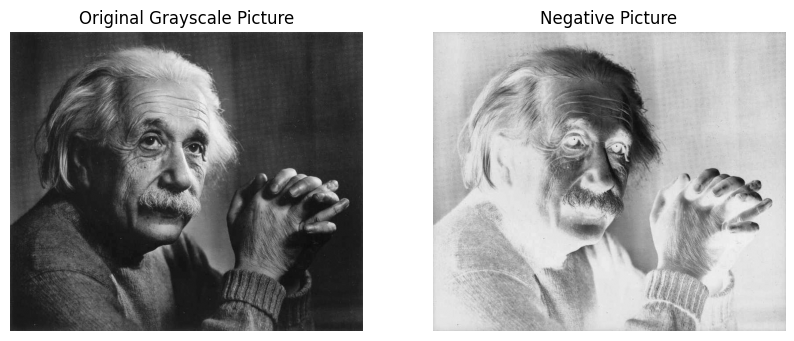

Spot | Original Color | Negative Color
---------------------------------------------
(322, 21) | 108 | 147
(62, 588) | 104 | 151
(568, 364) | 112 | 143
(490, 483) | 113 | 142
(191, 537) | 107 | 148


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/yalci/uyg332_project/einstein.tif", cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Can't load picture, check the file path!")
else:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Grayscale Picture')
    plt.axis('off')

    img_negative = 255 - img

    plt.subplot(1, 2, 2)
    plt.imshow(img_negative, cmap='gray')
    plt.title('Negative Picture')
    plt.axis('off')
    plt.show()

    height, width = img.shape
    random_pixels = np.random.randint(0, [height, width], size=(5, 2))
    print("Spot | Original Color | Negative Color")
    print("-" * 45)
    for i, (y, x) in enumerate(random_pixels):
        orig_intensity = img[y, x]
        neg_intensity = img_negative[y, x]
        print(f"({y}, {x}) | {orig_intensity} | {neg_intensity}")

## Problem-3 (15 Points)
For this problem, use the image named as pout.tiff.
1. Read and display the original image in grayscale.
2. Apply log transform to original image and display the result.
3. Apply inverse log transform to original image and display the result.
4. Apply inverse log transform to image you get from step 2 and display the result.
5. Comment on the images you get from step 2 and step 4.

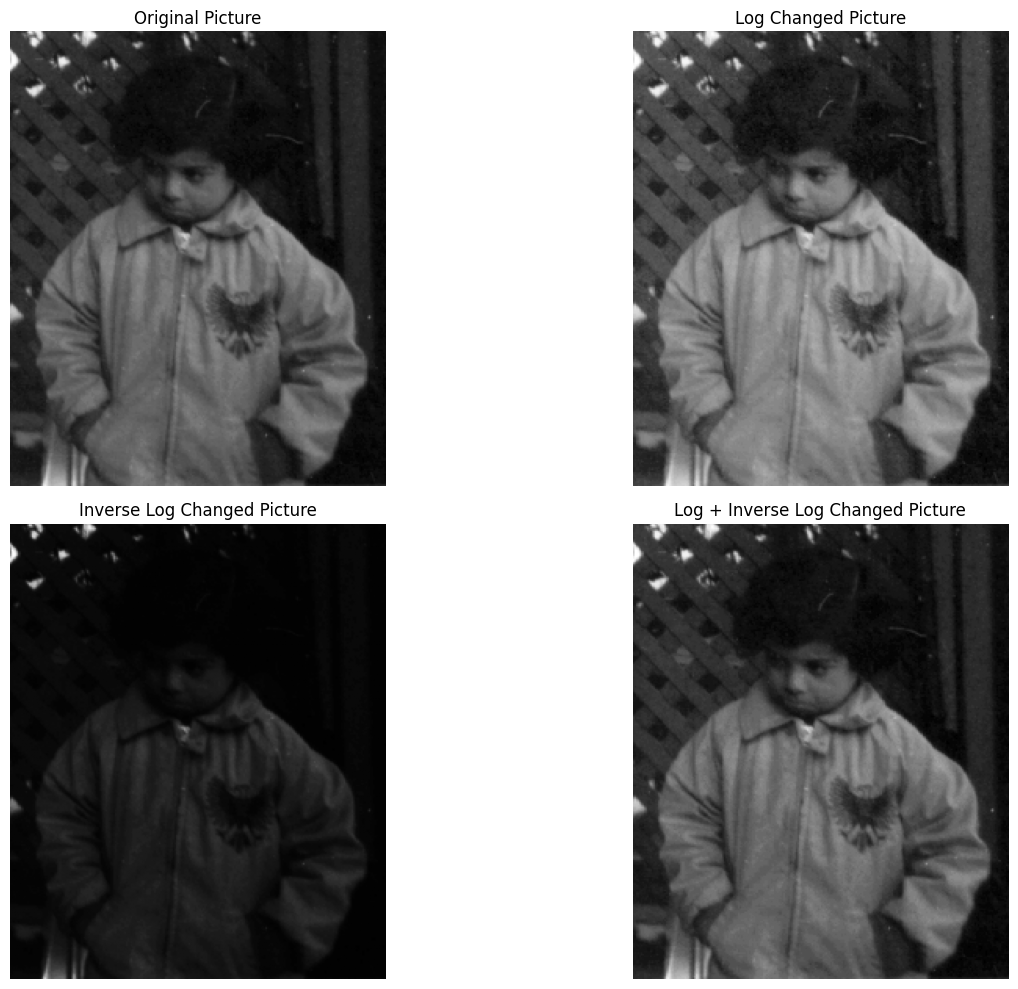

Note:
- Log change makes dark parts brighter, so you see more details.
- Inverse log change makes the picture brighter or darker because it reverses the colors.
- Log + inverse log change should make the picture look like the original, but it might not be exactly the same.
- The picture in the second spot is brighter and shows more details. The picture in the fourth spot looks like the original, but there might be small differences.


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/yalci/uyg332_project/images/pout.tif", cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Can't load picture, check the file path!")
else:
    plt.figure(figsize=(15, 10))

    # Original picture
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Picture')
    plt.axis('off')

    # Apply log change
    c = 255 / np.log(1 + np.max(img))
    img_log = c * np.log(1 + img.astype(np.float32))
    img_log = np.uint8(img_log)
    plt.subplot(2, 2, 2)
    plt.imshow(img_log, cmap='gray')
    plt.title('Log Changed Picture')
    plt.axis('off')

    # Apply inverse log change
    img_inv_log = np.exp(img.astype(np.float32) / c) - 1
    img_inv_log = np.uint8(img_inv_log)
    plt.subplot(2, 2, 3)
    plt.imshow(img_inv_log, cmap='gray')
    plt.title('Inverse Log Changed Picture')
    plt.axis('off')

    # Apply inverse log change to the log changed picture
    img_log_inv_log = np.exp(img_log.astype(np.float32) / c) - 1
    img_log_inv_log = np.uint8(img_log_inv_log)
    plt.subplot(2, 2, 4)
    plt.imshow(img_log_inv_log, cmap='gray')
    plt.title('Log + Inverse Log Changed Picture')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Note:")
    print("- Log change makes dark parts brighter, so you see more details.")
    print("- Inverse log change makes the picture brighter or darker because it reverses the colors.")
    print("- Log + inverse log change should make the picture look like the original, but it might not be exactly the same.")
    print("- The picture in the second spot is brighter and shows more details. The picture in the fourth spot looks like the original, but there might be small differences.")

## Problem-4 (15 Points)
For this problem, use the image named as moon.tiff.
1. Read and display the original image in grayscale.
2. Apply unsharp masking in spatial domain using below formulation:
𝑔𝑔(𝑥𝑥, 𝑦𝑦) = 𝑓𝑓(𝑥𝑥, 𝑦𝑦) + 𝑘𝑘 ∗ 𝑚𝑚𝑚𝑚𝑚𝑚𝑚𝑚(𝑥𝑥, 𝑦𝑦)
You need to use three different 𝑘𝑘 values. You can select the value of 𝑘𝑘 arbitrarily.
3. Apply unsharp masking in frequency domain using below formulation:
𝑔𝑔(𝑥𝑥, 𝑦𝑦) = ℱ−1[1 + 𝑘𝑘 ∗ 𝐻𝐻𝐻𝐻𝐻𝐻(𝑢𝑢, 𝑣𝑣)]𝐹𝐹(𝑢𝑢, 𝑣𝑣)
where ℱ−1is the inverse Fourier transform, 𝐻𝐻𝐻𝐻𝐻𝐻 is the high-pass filter function in frequency
domain, and 𝐹𝐹(. ) is the input image in frequency domain. You need to use three different 𝑘𝑘
values. You can select the value of 𝑘𝑘 arbitrarily (BUT use same 𝑘𝑘 values from the step 2).
Remember that when designing your high-pass filter, you need to select the 𝐷𝐷0 (cut-off
frequency). You can select the proper 𝐷𝐷0 by trial or analysing the original input image in
frequency domain. There is no ideal 𝐷𝐷0 and 𝑘𝑘 so while finding results, keep that in mind.
4. Display the result from the step 2 side by side with the result from the step 3 for each value of 𝑘𝑘.
Example: Fig-1 (k = 0.2), Fig-2 (k=0.5), Fig-3 (k=1)
TIP: Slides from Week-4 and Week-5 would be a good starting point.

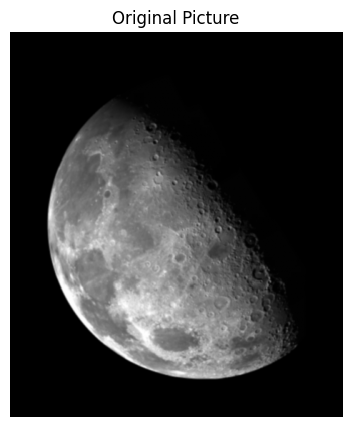

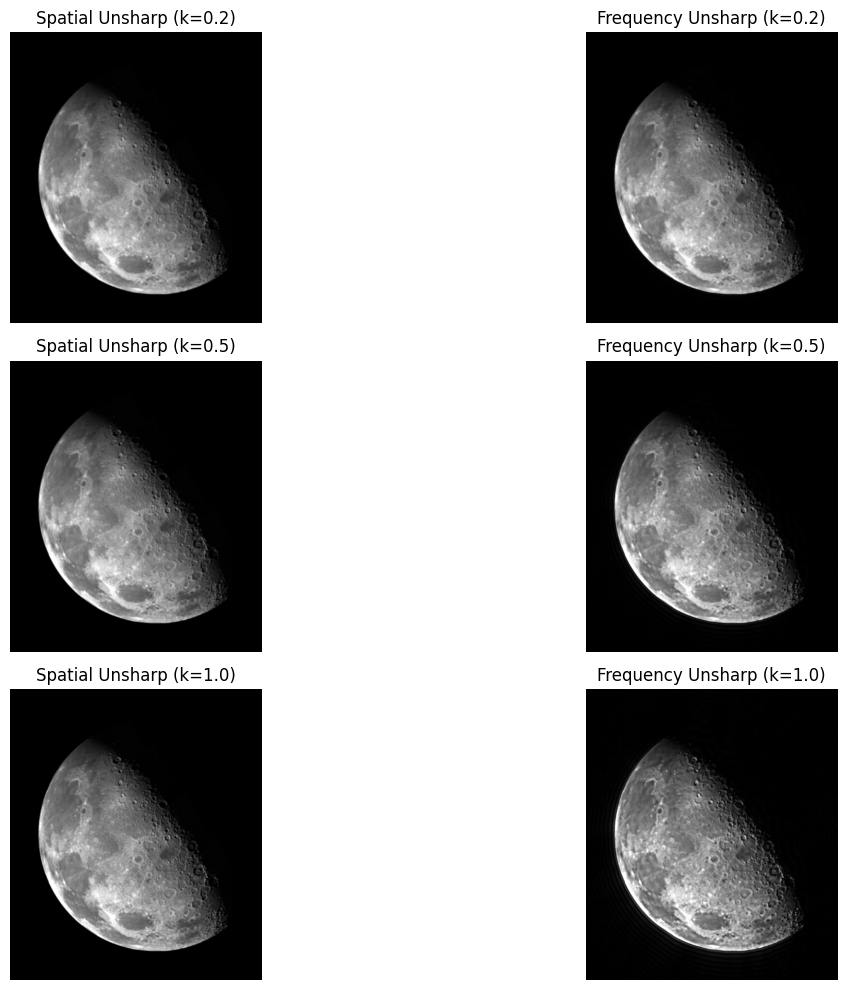

Note:
- Spatial unsharp masking uses a blurred image to make details clearer.
- Frequency unsharp masking uses high-pass filter to make details clearer.


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/yalci/uyg332_project/images/moon.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Can't load picture, check the file path!")
else:
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title('Original Picture')
    plt.axis('off')
    plt.show()

    k_values = [0.2, 0.5, 1.0]
    results_spatial = []
    for k in k_values:
        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        mask = img.astype(float) - blurred.astype(float)
        sharpened = img + k * mask
        sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
        results_spatial.append(sharpened)

    results_frequency = []
    for k in k_values:
        f = np.fft.fft2(img.astype(float))
        fshift = np.fft.fftshift(f)
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        D0 = 30
        u, v = np.indices((rows, cols))
        D = np.sqrt((u - crow)**2 + (v - ccol)**2)
        H_hp = np.where(D > D0, 1, 0)
        H = 1 + k * H_hp
        fshift_sharp = fshift * H
        f_ishift = np.fft.ifftshift(fshift_sharp)
        img_sharp = np.fft.ifft2(f_ishift)
        img_sharp = np.abs(img_sharp).clip(0, 255).astype(np.uint8)
        results_frequency.append(img_sharp)

    plt.figure(figsize=(15, 10))
    for i, k in enumerate(k_values):
        plt.subplot(3, 2, 2*i + 1)
        plt.imshow(results_spatial[i], cmap='gray')
        plt.title(f'Spatial Unsharp (k={k})')
        plt.axis('off')

        plt.subplot(3, 2, 2*i + 2)
        plt.imshow(results_frequency[i], cmap='gray')
        plt.title(f'Frequency Unsharp (k={k})')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    print("Note:")
    print("- Spatial unsharp masking uses a blurred image to make details clearer.")
    print("- Frequency unsharp masking uses high-pass filter to make details clearer.")

## Problem-5 (15 Points)
For this problem, use the image named as pcb.tiff.
1. Read and display the original image in grayscale.
2. Identify and describe the type of noise (e.g., salt-and-pepper, Gaussian) using visual inspection
and/or statistical tools (e.g., histogram).
3. Remove the noise using proper filtering sequence.
TIP: Refer to Week-4 slides for guidance on filtering techniques. 

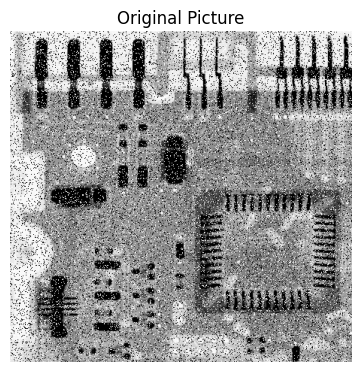

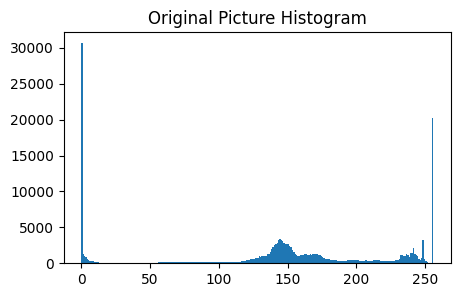

Noise Check:
- If the histogram has sudden high bars at 0 and 255, it might be salt-and-pepper noise.
- If it's smoother, it might be Gaussian noise.
- Look at the picture: black/white dots mean salt-and-pepper, fuzzy parts mean Gaussian noise.


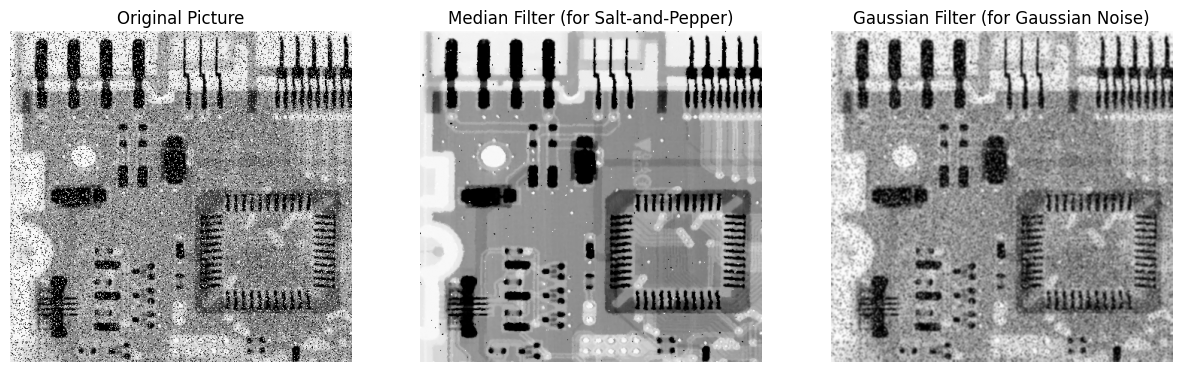

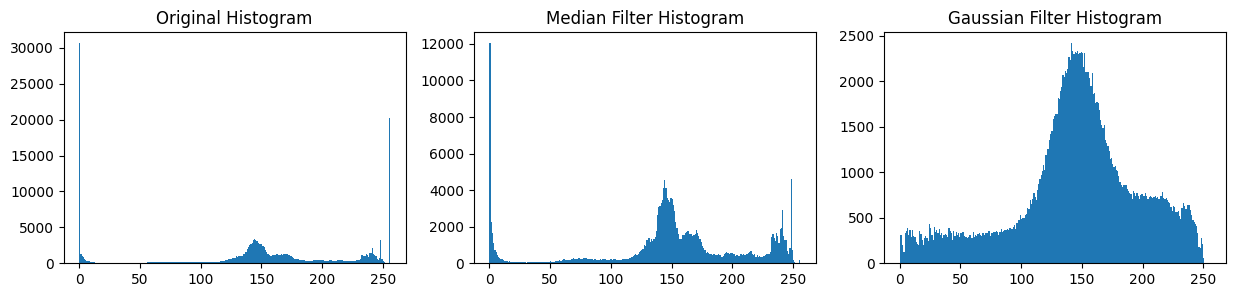

Note:
- If the histogram has high bars at 0 and 255, the median filter works better for salt-and-pepper noise.
- For Gaussian noise, the Gaussian filter works better.
- The median filter keeps the edges sharp and removes noise. The Gaussian filter makes the picture a bit blurry.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/yalci/uyg332_project/images/pcb.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Can't load picture, check the file path!")
else:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Picture')
    plt.axis('off')

    plt.figure(figsize=(5, 3))
    plt.hist(img.ravel(), bins=256, range=[0, 256])
    plt.title('Original Picture Histogram')
    plt.show()
    print("Noise Check:")
    print("- If the histogram has sudden high bars at 0 and 255, it might be salt-and-pepper noise.")
    print("- If it's smoother, it might be Gaussian noise.")
    print("- Look at the picture: black/white dots mean salt-and-pepper, fuzzy parts mean Gaussian noise.")

    img_median = cv2.medianBlur(img, 3)
    img_gaussian = cv2.GaussianBlur(img, (5, 5), 0)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Picture')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_median, cmap='gray')
    plt.title('Median Filter (for Salt-and-Pepper)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_gaussian, cmap='gray')
    plt.title('Gaussian Filter (for Gaussian Noise)')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, 1)
    plt.hist(img.ravel(), bins=256, range=[0, 256])
    plt.title('Original Histogram')
    plt.subplot(1, 3, 2)
    plt.hist(img_median.ravel(), bins=256, range=[0, 256])
    plt.title('Median Filter Histogram')
    plt.subplot(1, 3, 3)
    plt.hist(img_gaussian.ravel(), bins=256, range=[0, 256])
    plt.title('Gaussian Filter Histogram')
    plt.show()

    print("Note:")
    print("- If the histogram has high bars at 0 and 255, the median filter works better for salt-and-pepper noise.")
    print("- For Gaussian noise, the Gaussian filter works better.")
    print("- The median filter keeps the edges sharp and removes noise. The Gaussian filter makes the picture a bit blurry.")

## Problem-6 (25 Points)
For this problem, use the image named as pollen.tiff.
1. Read and display the original image in grayscale.
2. Comment on the problem presented at that image. While commenting on the problem, provide
proofs (numerical, visual, statistical etc.).
3. Use two independent approaches to solve the problem.
4. For each solution, display the results.
5. For each solution, justify your answer by providing proofs (numerical, visual, statistical etc.).
TIP: For this question, there is not a single correct answer but only use the approaches we discussed
in class. Avoid using AI-based denoising or enhancement techniques not discussed in class.

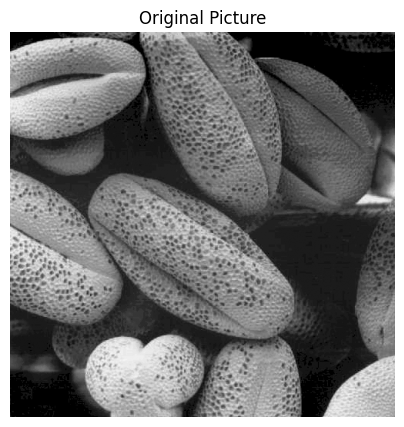

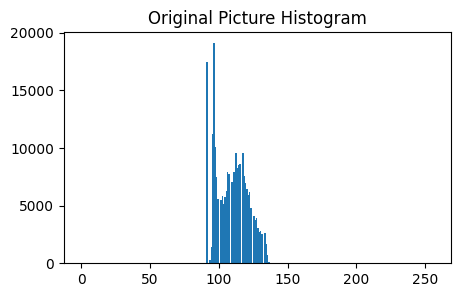

Problem Found:
- Average color: 109.08
- How colors change: 132.01
- Histogram: A narrow range of colors means low contrast. Small changes in pixels mean a little noise.
- Look at the picture: Details are not clear, low contrast, and a little noise is seen.


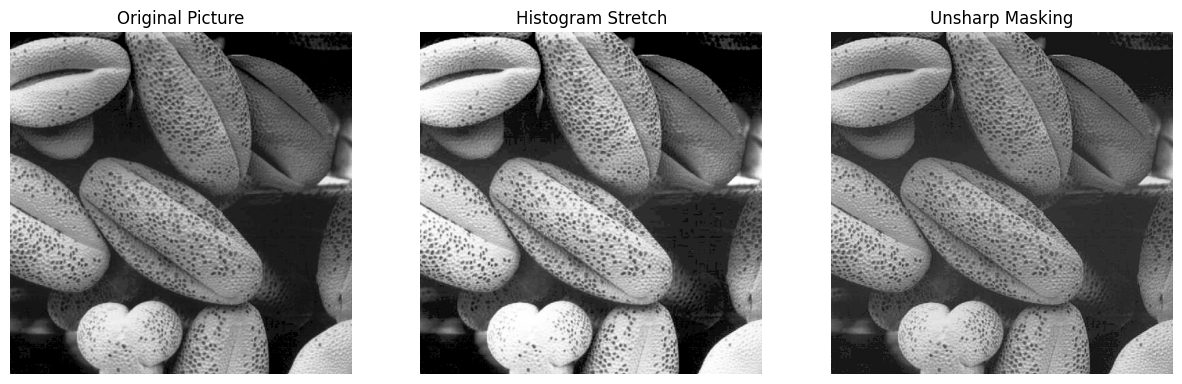

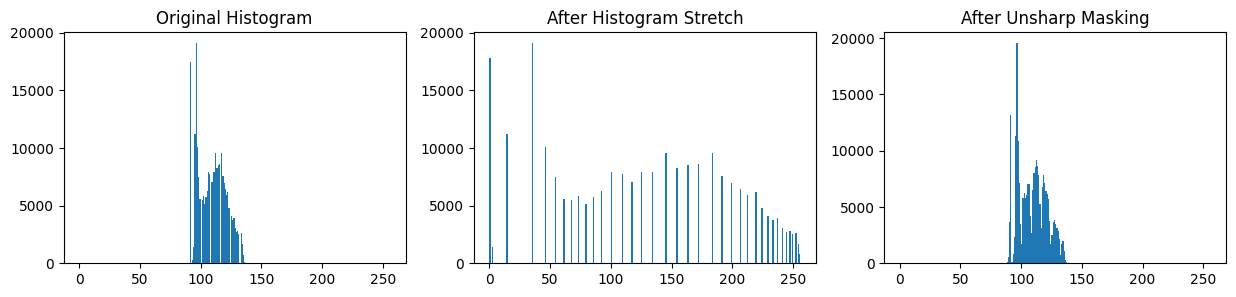

Proof of Solution:
- Histogram Stretch: Average color: 122.68, How colors change: 5989.27
- Unsharp Masking: Average color: 108.87, How colors change: 136.04
- Histogram stretch makes colors spread out more, so contrast gets better. The histogram becomes wider.
- Unsharp masking makes edges and details clear. How colors change goes up a little.
- Looking at the pictures: Histogram stretch is brighter with more contrast. Unsharp masking shows sharper details.


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/yalci/uyg332_project/images/pollen.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Can't load picture, check the file path!")
else:
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title('Original Picture')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(5, 3))
    plt.hist(img.ravel(), bins=256, range=[0, 256])
    plt.title('Original Picture Histogram')
    plt.show()
    mean_intensity = np.mean(img)
    variance_intensity = np.var(img)
    print("Problem Found:")
    print(f"- Average color: {mean_intensity:.2f}")
    print(f"- How colors change: {variance_intensity:.2f}")
    print("- Histogram: A narrow range of colors means low contrast. Small changes in pixels mean a little noise.")
    print("- Look at the picture: Details are not clear, low contrast, and a little noise is seen.")

    # Method 1: Histogram stretching (for low contrast)
    img_eq = cv2.equalizeHist(img)

    # Method 2: Unsharp masking (for more detail and less noise)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    mask = img.astype(float) - blurred.astype(float)
    img_sharp = img + 0.5 * mask
    img_sharp = np.clip(img_sharp, 0, 255).astype(np.uint8)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Picture')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_eq, cmap='gray')
    plt.title('Histogram Stretch')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_sharp, cmap='gray')
    plt.title('Unsharp Masking')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, 1)
    plt.hist(img.ravel(), bins=256, range=[0, 256])
    plt.title('Original Histogram')
    plt.subplot(1, 3, 2)
    plt.hist(img_eq.ravel(), bins=256, range=[0, 256])
    plt.title('After Histogram Stretch')
    plt.subplot(1, 3, 3)
    plt.hist(img_sharp.ravel(), bins=256, range=[0, 256])
    plt.title('After Unsharp Masking')
    plt.show()

    print("Proof of Solution:")
    print(f"- Histogram Stretch: Average color: {np.mean(img_eq):.2f}, How colors change: {np.var(img_eq):.2f}")
    print(f"- Unsharp Masking: Average color: {np.mean(img_sharp):.2f}, How colors change: {np.var(img_sharp):.2f}")
    print("- Histogram stretch makes colors spread out more, so contrast gets better. The histogram becomes wider.")
    print("- Unsharp masking makes edges and details clear. How colors change goes up a little.")
    print("- Looking at the pictures: Histogram stretch is brighter with more contrast. Unsharp masking shows sharper details.")